In [1]:
import numpy as np
import scipy.stats as ss
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')
%matplotlib inline
plt.rcParams["axes.labelsize"] = 16.
plt.rcParams["xtick.labelsize"] = 14.
plt.rcParams["ytick.labelsize"] = 14.
plt.rcParams["legend.fontsize"] = 12.
plt.rcParams["figure.figsize"] = [8., 5.]
SEED = 1337

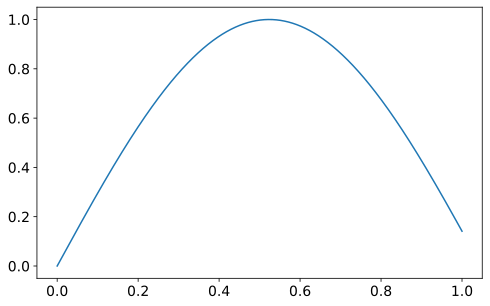

In [2]:
x = np.linspace(0, 1, 1000)
plt.plot(x, np.sin(3 * x))
plt.show()

In [3]:
n = 100
norm = ss.norm.rvs(loc=2, scale=1.5, size=n, random_state=SEED) # random variates, location, scale
expon = ss.expon.rvs(scale=2, size=n, random_state=SEED)
uni = ss.uniform(loc=1, scale=2).rvs(size=n, random_state=SEED)
lognorm = ss.lognorm(s=1, scale=np.exp(np.log(2) - 0.5)).rvs(size=n, random_state=SEED)

In [4]:
norm

array([ 0.94521904,  1.26457646,  1.51727851, -0.63261808,  2.30999671,
       -1.01689686,  1.16412394,  2.50582551,  4.32325396, -0.05610484,
        4.1379371 ,  1.58080414,  1.16055814,  3.77957505,  4.54777836,
       -0.53683024,  0.95071573,  2.87444426,  3.46733394,  0.17394184,
        0.00590683,  1.99781789,  0.02802097,  1.43058238,  3.89781597,
        2.18100162,  2.22191267, -2.13058869,  1.46465551,  2.01157675,
        4.21741574,  0.56357806,  3.99351216,  0.52122555,  2.7073358 ,
        1.98688021,  2.55052803,  3.67783212,  1.9874151 ,  2.69947307,
        3.89490305,  0.64751802,  0.45673596,  2.85451763,  2.96249717,
        2.38971789,  3.78976721,  0.43054946,  2.20983338, -0.59598376,
        1.80406533,  0.03460997, -1.25696863,  0.40072789,  1.95025723,
        4.19959362,  3.31496464,  3.00498437,  3.04617427,  1.62082185,
        2.85198066,  2.45658179,  0.49995561, -1.68462674,  2.37846053,
        3.14468064, -0.37518198,  2.29706342,  2.12787834,  2.96

In [5]:
data = pd.DataFrame({'norm': norm, 'expon': expon, 'uni': uni, 'lognorm': lognorm})
data.head(10)

,norm,expon,uni,lognorm
0,0.945219,0.607690,1.524049,0.600471
1,1.264576,0.345576,1.317368,0.742944
2,1.517279,0.651811,1.556253,0.879267
3,-0.632618,1.229844,1.918634,0.209731
4,2.309997,0.774270,1.642001,1.491544
5,-1.016897,1.461253,2.036786,0.162331
6,1.164124,0.607468,1.523886,0.694819
7,2.505826,7.466523,2.952171,1.699551
8,4.323254,2.639625,2.465629,5.708653
9,-0.056105,0.244955,1.230548,0.308020


In [6]:
print(data)

        norm     expon       uni   lognorm
0   0.945219  0.607690  1.524049  0.600471
1   1.264576  0.345576  1.317368  0.742944
2   1.517279  0.651811  1.556253  0.879267
3  -0.632618  1.229844  1.918634  0.209731
4   2.309997  0.774270  1.642001  1.491544
..       ...       ...       ...       ...
95  1.952639  0.538766  1.472298  1.175358
96  0.089087  1.123391  1.859517  0.339326
97  2.495538  1.002126  1.788227  1.687935
98  1.186227  1.429597  2.021419  0.705134
99  0.421957  0.267984  1.250806  0.423636

[100 rows x 4 columns]


In [7]:
display(data)
display(data)

,norm,expon,uni,lognorm
0,0.945219,0.607690,1.524049,0.600471
1,1.264576,0.345576,1.317368,0.742944
2,1.517279,0.651811,1.556253,0.879267
3,-0.632618,1.229844,1.918634,0.209731
4,2.309997,0.774270,1.642001,1.491544
...,...,...,...,...
95,1.952639,0.538766,1.472298,1.175358
96,0.089087,1.123391,1.859517,0.339326
97,2.495538,1.002126,1.788227,1.687935
98,1.186227,1.429597,2.021419,0.705134


,norm,expon,uni,lognorm
0,0.945219,0.607690,1.524049,0.600471
1,1.264576,0.345576,1.317368,0.742944
2,1.517279,0.651811,1.556253,0.879267
3,-0.632618,1.229844,1.918634,0.209731
4,2.309997,0.774270,1.642001,1.491544
...,...,...,...,...
95,1.952639,0.538766,1.472298,1.175358
96,0.089087,1.123391,1.859517,0.339326
97,2.495538,1.002126,1.788227,1.687935
98,1.186227,1.429597,2.021419,0.705134


In [8]:
stats = data.agg([np.min, np.max, np.mean, np.median, np.std])
stats.loc['Q1'] = data.apply(np.quantile, q=0.25)
stats.loc['Q3'] = data.apply(np.quantile, q=0.75)
stats.loc['std (unb)'] = data.apply(np.std, ddof=1) # delta degrees of freedom 1 / (n - ddof) \sum ()^2
stats.loc['V'] = data.apply(ss.variation)
stats.loc['skew'] = data.apply(ss.skew)
stats.loc['kurtosis'] = data.apply(ss.kurtosis)
stats.loc['std (b)'] = data.apply(np.std)
stats

,norm,expon,uni,lognorm
amin,-2.130589,0.005810,1.005802,0.077260
amax,4.547778,11.896154,2.994778,6.630406
mean,1.768066,2.095526,2.016378,1.620452
median,1.969760,1.356284,1.984880,1.188928
std,1.525619,2.207944,0.559109,1.487152
Q1,0.552990,0.643107,1.549915,0.462341
Q3,2.961196,2.633325,2.463942,2.302382
std (unb),1.525619,2.207944,0.559109,1.487152
V,0.858550,1.048365,0.275894,0.913139
skew,-0.305155,2.069849,0.073295,1.391199


In [9]:
help(pd.DataFrame.std)

Help on function std in module pandas.core.frame:

std(self, axis=None, skipna=None, level=None, ddof=1, numeric_only=None, **kwargs)
    Return sample standard deviation over requested axis.
    
    Normalized by N-1 by default. This can be changed using the ddof argument
    
    Parameters
    ----------
    axis : {index (0), columns (1)}
    skipna : bool, default True
        Exclude NA/null values. If an entire row/column is NA, the result
        will be NA.
    level : int or level name, default None
        If the axis is a MultiIndex (hierarchical), count along a
        particular level, collapsing into a Series.
    ddof : int, default 1
        Delta Degrees of Freedom. The divisor used in calculations is N - ddof,
        where N represents the number of elements.
    numeric_only : bool, default None
        Include only float, int, boolean columns. If None, will attempt to use
        everything, then use only numeric data. Not implemented for Series.
    
    Returns

In [10]:
data[data['norm'] < 0]

,norm,expon,uni,lognorm
3,-0.632618,1.229844,1.918634,0.209731
5,-1.016897,1.461253,2.036786,0.162331
9,-0.056105,0.244955,1.230548,0.308020
15,-0.536830,3.117094,2.579117,0.223561
27,-2.130589,0.444276,1.398390,0.077260
49,-0.595984,7.214402,2.945745,0.214916
52,-1.256969,1.662608,2.129038,0.138323
63,-1.684627,2.853843,2.519906,0.104010
66,-0.375182,2.196013,2.332929,0.248999
72,-0.926017,0.616995,1.530901,0.172470


In [11]:
data.describe()

,norm,expon,uni,lognorm
count,100.000000,100.000000,100.000000,100.000000
mean,1.768066,2.095526,2.016378,1.620452
std,1.525619,2.207944,0.559109,1.487152
min,-2.130589,0.005810,1.005802,0.077260
25%,0.552990,0.643107,1.549915,0.462341
50%,1.969760,1.356284,1.984880,1.188928
75%,2.961196,2.633325,2.463942,2.302382
max,4.547778,11.896154,2.994778,6.630406


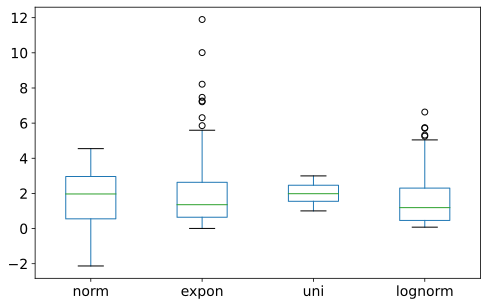

In [12]:
data.boxplot()
plt.grid(False)
plt.show()

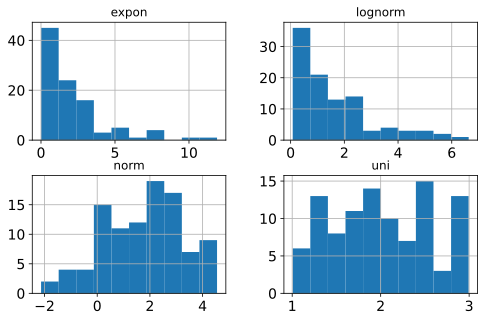

In [13]:
data.hist(bins='rice')
plt.show()

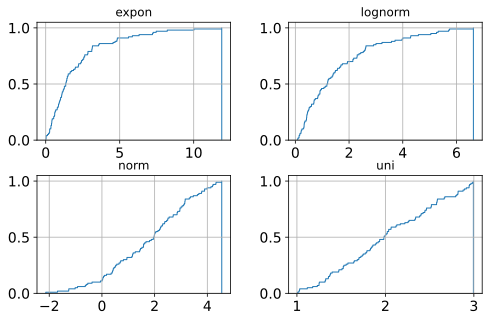

In [14]:
data.hist(bins=10000, cumulative=True, density=True, histtype='step')
plt.show()

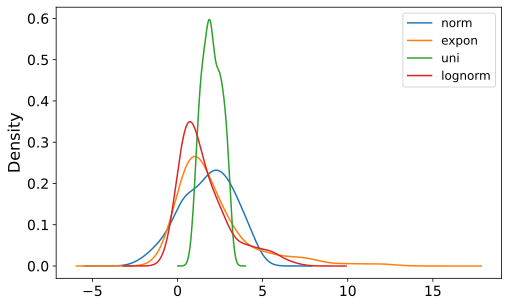

In [15]:
data.plot(kind='kde') # kernel density estimation
plt.show()

In [16]:
help(ss.norm.ppf)

Help on method ppf in module scipy.stats._distn_infrastructure:

ppf(q, *args, **kwds) method of scipy.stats._continuous_distns.norm_gen instance
    Percent point function (inverse of `cdf`) at q of the given RV.
    
    Parameters
    ----------
    q : array_like
        lower tail probability
    arg1, arg2, arg3,... : array_like
        The shape parameter(s) for the distribution (see docstring of the
        instance object for more information)
    loc : array_like, optional
        location parameter (default=0)
    scale : array_like, optional
        scale parameter (default=1)
    
    Returns
    -------
    x : array_like
        quantile corresponding to the lower tail probability q.



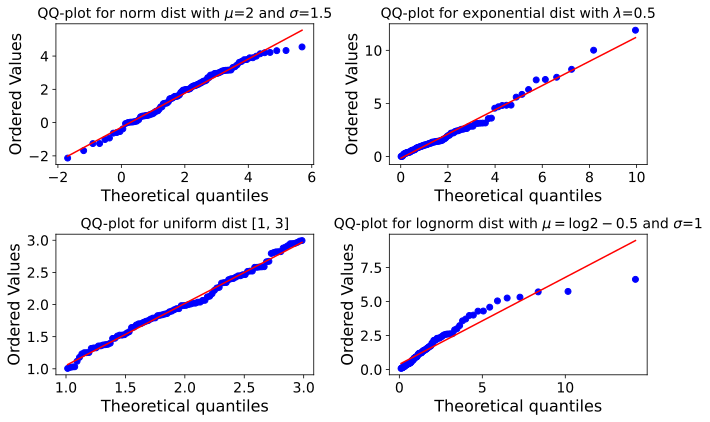

In [17]:
fig = plt.figure(figsize=(10, 6))
ax_norm = fig.add_subplot(221) # (m, n, k) - m строк, n столбцов, k - номер подграфика
res = ss.probplot(data['norm'], dist=ss.norm, sparams=(2, 1.5), plot=ax_norm, fit=False)
ax_norm.set_title("QQ-plot for norm dist with $\mu$=2 and $\sigma$=1.5", fontsize=14.)

ax_expon = fig.add_subplot(222)
res = ss.probplot(data['expon'], dist=ss.expon, sparams=(0, 2), plot=ax_expon, fit=False)
ax_expon.set_title("QQ-plot for exponential dist with $\lambda$=0.5", fontsize=14.)

ax_uni = fig.add_subplot(223)
res = ss.probplot(data['uni'], dist=ss.uniform, sparams=(1, 2), plot=ax_uni, fit=False)
ax_uni.set_title("QQ-plot for uniform dist [1, 3]", fontsize=14.)

ax_lognorm = fig.add_subplot(224)
res = ss.probplot(data['lognorm'], dist=ss.lognorm, sparams=(1, 0, np.exp(np.log(2) - 0.5)), plot=ax_lognorm, fit=False)
ax_lognorm.set_title("QQ-plot for lognorm dist with $\mu=\log 2 - 0.5$ and $\sigma$=1", fontsize=14.)

fig.tight_layout()
plt.show()

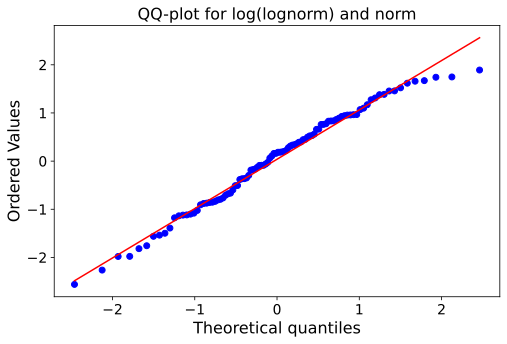

In [18]:
loglognorm = np.log(lognorm)
fig = plt.figure()
ax = fig.add_subplot(111)
res = ss.probplot(loglognorm, dist=ss.norm, sparams=(0, 1), plot=ax, fit=False)
ax.set_title("QQ-plot for log(lognorm) and norm", fontsize=16.)
plt.show()

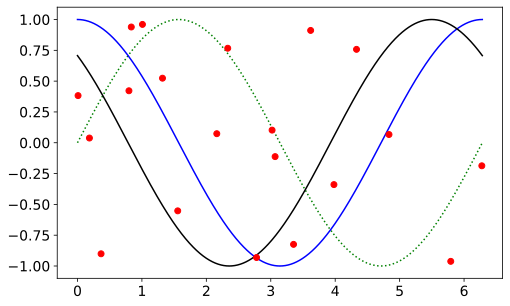

In [19]:
x = np.linspace(0, 2*np.pi, 1000)
x1 = np.linspace(0, 2*np.pi, 10000)
plt.plot(x, np.sin(x), ':g', x1, np.cos(x1), '-b')
plt.plot(x1, np.cos(x1 + np.pi/4), '-k')
x2 = ss.uniform(scale=2*np.pi).rvs(size=20)
y2 = ss.uniform(loc=-1, scale=2).rvs(size=20)
plt.plot(x2, y2, 'or')
plt.show()

In [20]:
df = pd.read_fwf('Практика_2_data.txt', na_values='*', header=None)
df.head(5)

FileNotFoundError: [Errno 2] No such file or directory: 'Практика_2_data.txt'

In [ ]:
df[(df[8] > 40000) & (df[12] > 300)]

In [ ]:
df.groupby(11).count()[[0]]